In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart = pd.read_csv(r"C:\......\heart.csv")

In [3]:
heart.shape

(303, 14)

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
# # Predictors information
# age
# sex
# cp = chest pain type (4 values)
# trestbps = resting blood pressure
# chol = serum cholestoral in mg/dl
# fbs = fasting blood sugar > 120 mg/dl
# restecg = resting electrocardiographic results (values 0,1,2)
# thalach =  maximum heart rate achieved
# exang = exercise induced angina
# oldpeak = ST depression induced by exercise relative to rest
# slope = the slope of the peak exercise ST segment
# ca = number of major vessels (0-3) colored by flourosopy
# thal = thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

# Exploratory Data Analysis

In [7]:
# Checking for the missing values

In [8]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# Checking for the duplicated values

In [10]:
heart.duplicated().sum() # here we can see that there is 1 duplicate value which we can drop

1

In [11]:
heart[heart.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [12]:
heart.drop_duplicates(inplace = True)

In [13]:
heart.shape # the duplicate entry has been deleted

(302, 14)

In [14]:
heart.apply(lambda x: len(x.unique()))

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [15]:
# from above table below analysis can be withdrawn:
# there are 41 different age groups of people
# data is about both male and female

In [16]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
heart.corr()[0:1] # Checking for the coorelations between the predictors nad target variables

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.0,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.11159,-0.395235,0.093216,0.20604,-0.164124,0.302261,0.065317,-0.221476


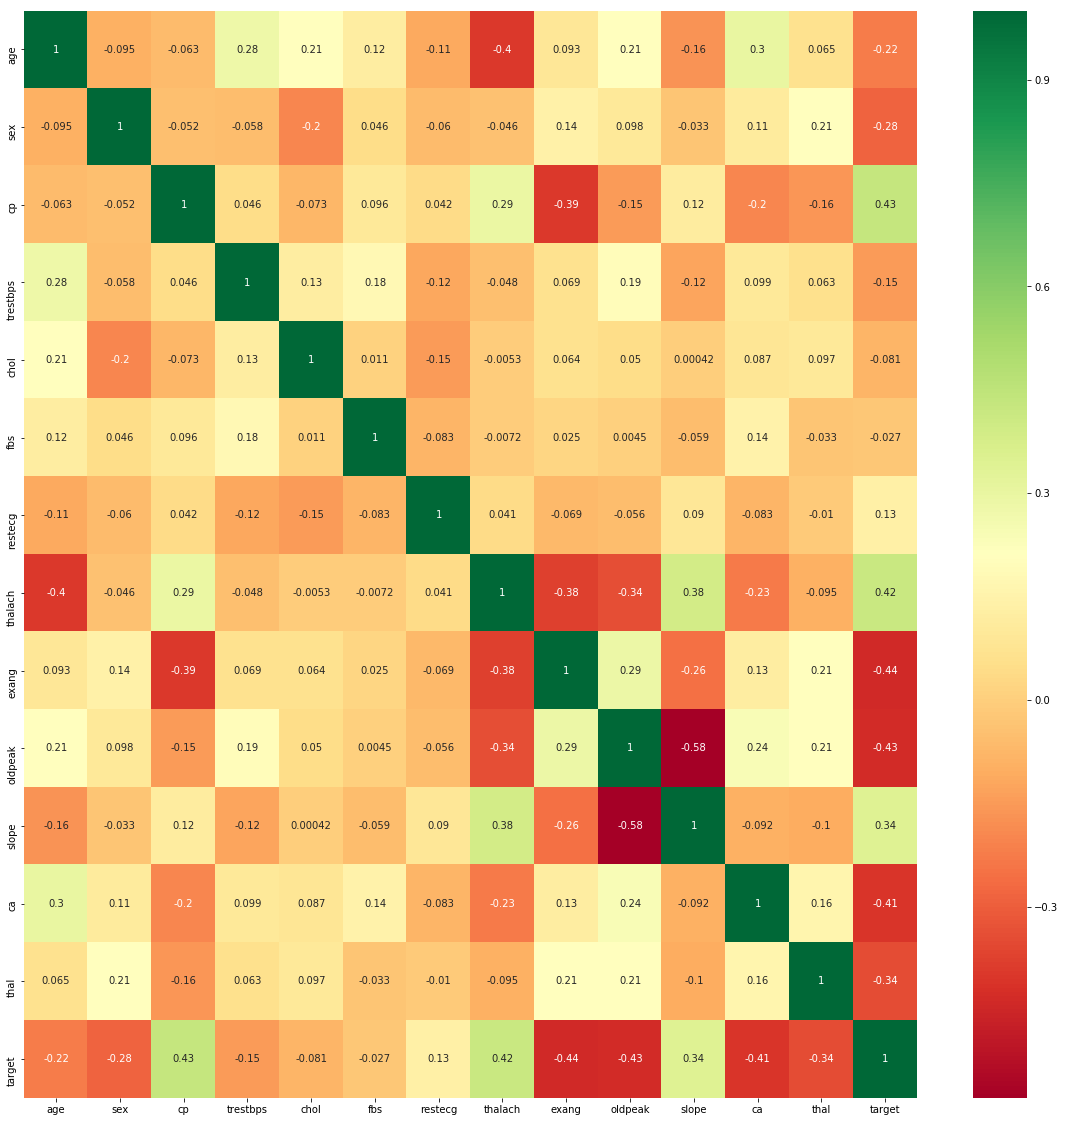

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(heart[heart.columns].corr(), annot = True, cmap = "RdYlGn")
plt.show()


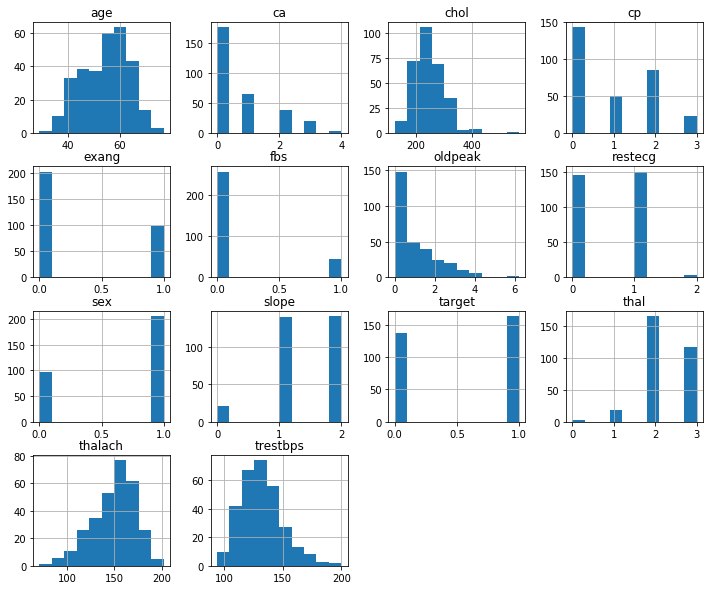

In [19]:
heart.hist(figsize = [12,10])
plt.show()

In [20]:
heart.target.value_counts(normalize = True) # As we can see that distribution of data in target varibale is not bad

1    0.543046
0    0.456954
Name: target, dtype: float64

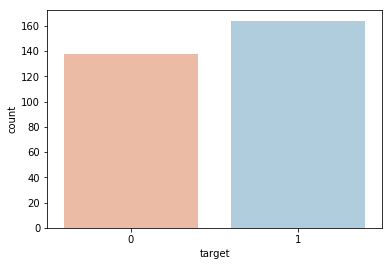

In [21]:
sns.countplot(x="target", data=heart, palette="RdBu")
plt.show()

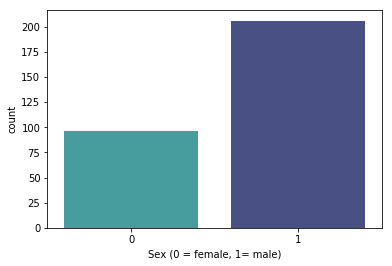

In [22]:
sns.countplot(x='sex', data=heart, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

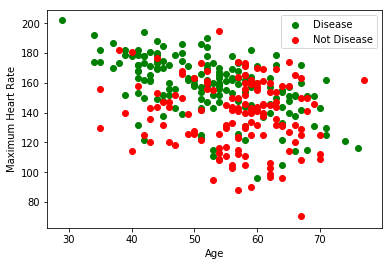

In [23]:
# Relationship between “Maximum Heart Rate” and “Age”
plt.scatter(x=heart.age[heart.target==1], y=heart.thalach[(heart.target==1)], c="green")
plt.scatter(x=heart.age[heart.target==0], y=heart.thalach[(heart.target==0)], c = 'red')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [24]:
X = heart.iloc[:,:-1].values
y = heart.iloc[:,13].values

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [26]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [27]:
# normalizing the data using the Standard Scaler method
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [28]:
# taking the value of K = 5
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)

In [29]:
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.88


In [30]:
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.88


In [31]:
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.84


In [32]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [33]:
cm # In the output, 26 and 40 are correct predictions, and 7 and 3 are incorrect predictions.

array([[27,  6],
       [ 6, 37]], dtype=int64)